In [71]:
import pandas as pd ## Preparador de datos
import matplotlib.pyplot as plt ### Visualizador
import missingno as msno ### Para ver valores faltantes
import numpy as np ## Calculos matriciales
import seaborn as sns ### Estilizador y formateador de imagenes
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


In [72]:
shapefile_path = 'C:\\Users\\JohanStivenPaezBermu\\OneDrive - Asulado\\Python\\Python_MSc\\Tesis\\ESE_Capacidad_Instalada\\ESE_Capacidad_Instalada.shp'
# Carga el Shapefile
Mapa_Antioquia = gpd.read_file(shapefile_path)
Mapa_Antioquia.head(1)

#print(Mapa_Antioquia.head())

,OBJECTID,COD_MPIO,MPIO_NOMBR,COD_ZONA,COD_SUBREG,REGION,SUBREGION,ZONA,TERRIT_CAR,Shape__Are,Shape__Len,geometry
0,1,05761,SOPETRÁN,Z14,SR06,CORANTIOQUIA,OCCIDENTE,Cauca Medio,Hevexicos,2.190716e+08,93728.01466,"POLYGON ((826004.851 1211021.823, 825864.916 1..."


# CARGA DATOS DE SENSORES

In [73]:
df_Sensores = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Precipitacion_2011_2023_ANT\\Consolidado_Precipitacion_Antioquia.csv")
#df_Sensores.shape ## (67172, 21)
df_Sensores.head(1).T

,0
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,Antioquia
Municipio,Rionegro


In [89]:
# COLOCO EL MUNICIPIO Y DEPARTAMENTO EN MAYUSCULA
df_Sensores['Municipio'] = df_Sensores['Municipio'].str.upper()
df_Sensores['Departamento'] = df_Sensores['Departamento'].str.upper()
df_Sensores.head(1).T

,0
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,ANTIOQUIA
Municipio,RIONEGRO


In [84]:
df_Cod_DANE = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\COD_MUNICIPIOS.csv",encoding='latin1')
#df_Cod_DANE.shape # (1103, 5)
df_Cod_DANE['Municipio'] = df_Cod_DANE['Municipio'].str.upper()
df_Cod_DANE['Departamento'] = df_Cod_DANE['Departamento'].str.upper()
df_Cod_DANE.head(1)

,cod_depto,cod_muni,Departamento,Municipio,cobertura
0,5,1,ANTIOQUIA,MEDELLÍN,77


In [85]:
#df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join(row[['cod_depto', 'cod_muni']]), axis=1)
longitud_municipio = 3
longitud_departamento = 2
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].astype(str)
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].apply(lambda x: x.zfill(longitud_municipio) if len(x) < longitud_municipio else x)

df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].astype(str)
df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].apply(lambda x: x.zfill(longitud_departamento) if len(x) < longitud_departamento else x)


In [86]:

df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join([str(row['cod_depto']), str(row['cod_muni'])]), axis=1)
df_Cod_DANE.head(1)

,cod_depto,cod_muni,Departamento,Municipio,cobertura,codigo_DANE
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001


In [93]:
df_merge_DANE_SENSOR = pd.merge(df_Cod_DANE, df_Sensores, on='Municipio', how='left')
df_merge_DANE_SENSOR.head(1).T
#df_DIAN_Sensores.shape  (85121, 26)

,0
cod_depto,05
cod_muni,001
Departamento_x,ANTIOQUIA
Municipio,MEDELLÍN
cobertura,77
codigo_DANE,05001
CodigoEstacion,27015330.0
NombreEstacion,OLAYA HERRERA - AUT [27015330]
Latitud,6.224679
Longitud,-75.588225


In [91]:
df1_duplicados = df_Cod_DANE[df_Cod_DANE.duplicated('Municipio')]
print("Duplicados en df1-df_Cod_DANE:")
print(df1_duplicados)

# Verificar duplicados en df2
df2_duplicados = df_Sensores[df_Sensores.duplicated('Municipio')]
print("Duplicados en df2 - df_Sensores:")
print(df2_duplicados)

Duplicados en df1-df_Cod_DANE:
     cod_depto cod_muni  Departamento    Municipio cobertura codigo_DANE
200         25      258  CUNDINAMARCA     EL PEÑÓN       302       25258
206         25      402  CUNDINAMARCA      LA VEGA       302       25402
227         44      874    LA GUAJIRA   VILLANUEVA       302       44874
244         52      612        NARIÑO     RICAURTE       302       52612
263         68      077     SANTANDER      BARBOSA       302       68077
...        ...      ...           ...          ...       ...         ...
1088        86      757      PUTUMAYO   SAN MIGUEL     1000+       86757
1089        86      760      PUTUMAYO     SANTIAGO     1000+       86760
1092        88      564    SAN ANDRÉS  PROVIDENCIA     1000+       88564
1094        95      015      GUAVIARE      CALAMAR     1000+       95015
1096        95      200      GUAVIARE   MIRAFLORES     1000+       95200

[82 rows x 6 columns]
Duplicados en df2 - df_Sensores:
       CodigoEstacion                

In [100]:
Sensores_Unicos = df_merge_DANE_SENSOR.drop_duplicates(subset=['codigo_DANE', 'NombreEstacion'])
Sensores_Unicos.head(1)
#conteo = datos_relacionados['Nombre de la estación'].value_counts().reset_index()

,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,codigo_DANE,CodigoEstacion,NombreEstacion,Latitud,Longitud,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001,27015330.0,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,01/01/2017 00:00,0.0,50.0,NaN,900.0


In [103]:
#df_Sensores['fecha'] = pd.to_datetime(df['fecha'], format='%m/%d/%Y %H:%M')


Sensores_Unicos = Sensores_Unicos.rename(columns={'codigo_DANE': 'COD_MPIO'})
Sensores_Unicos.head(1)


,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,COD_MPIO,CodigoEstacion,NombreEstacion,Latitud,Longitud,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001,27015330.0,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,01/01/2017 00:00,0.0,50.0,NaN,900.0


In [104]:
mapa_con_sensores = Mapa_Antioquia.merge(Sensores_Unicos, on='COD_MPIO', how='left')


<Axes: >

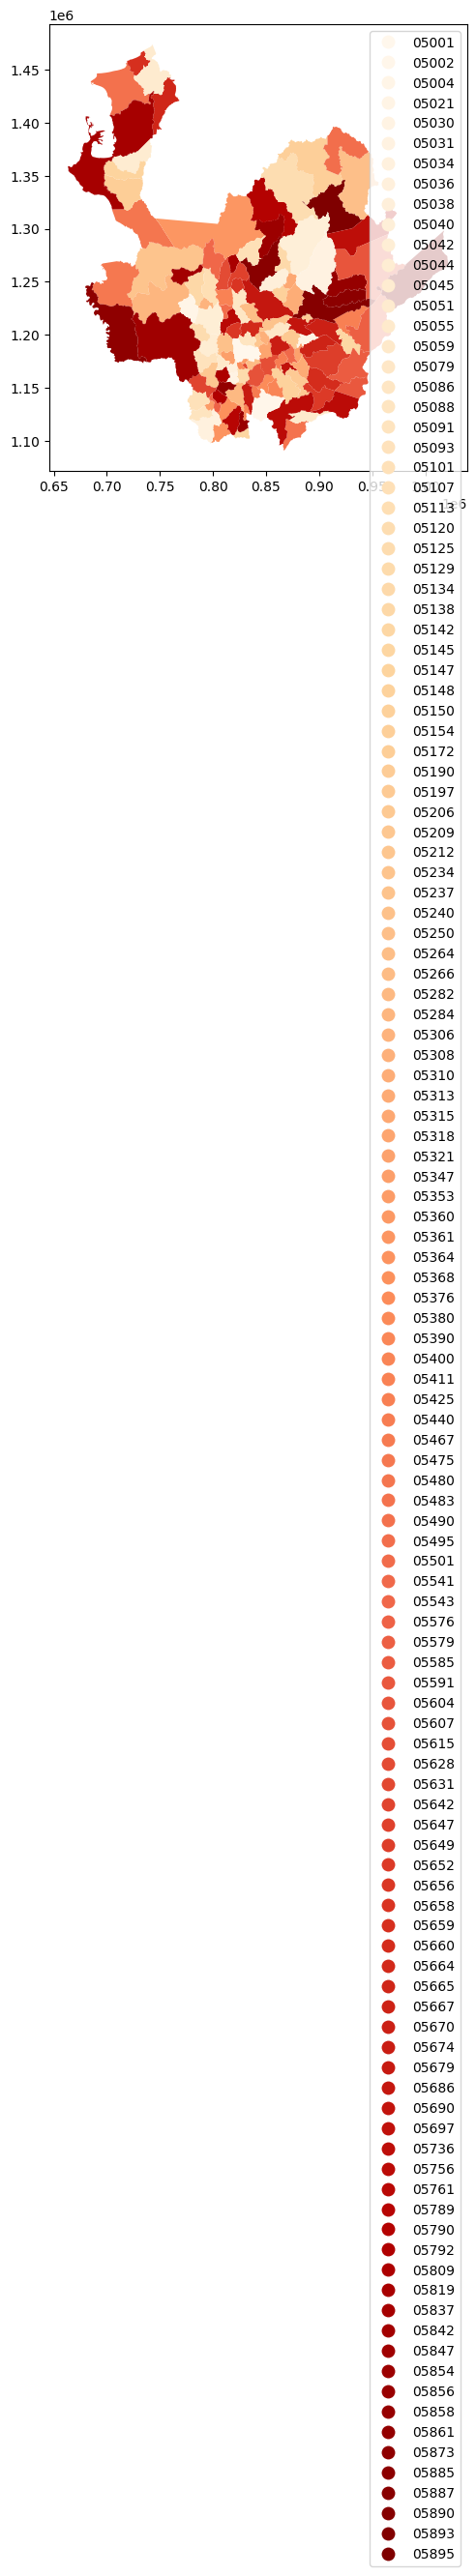

In [105]:
mapa_con_sensores.plot(column='COD_MPIO', cmap='OrRd', legend=True, figsize=(10, 6))

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

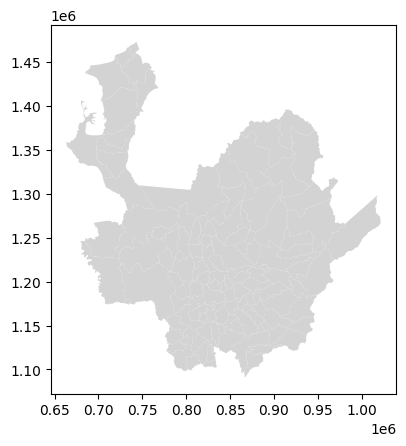

In [27]:
fig, ax = plt.subplots(1, 1)
Mapa_Antioquia.plot(ax=ax, color='lightgrey') ### Nueva
df_DIAN_Sensores.plot(column="cantidad", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title('Cantidad de sensores por municipio')
plt.show()

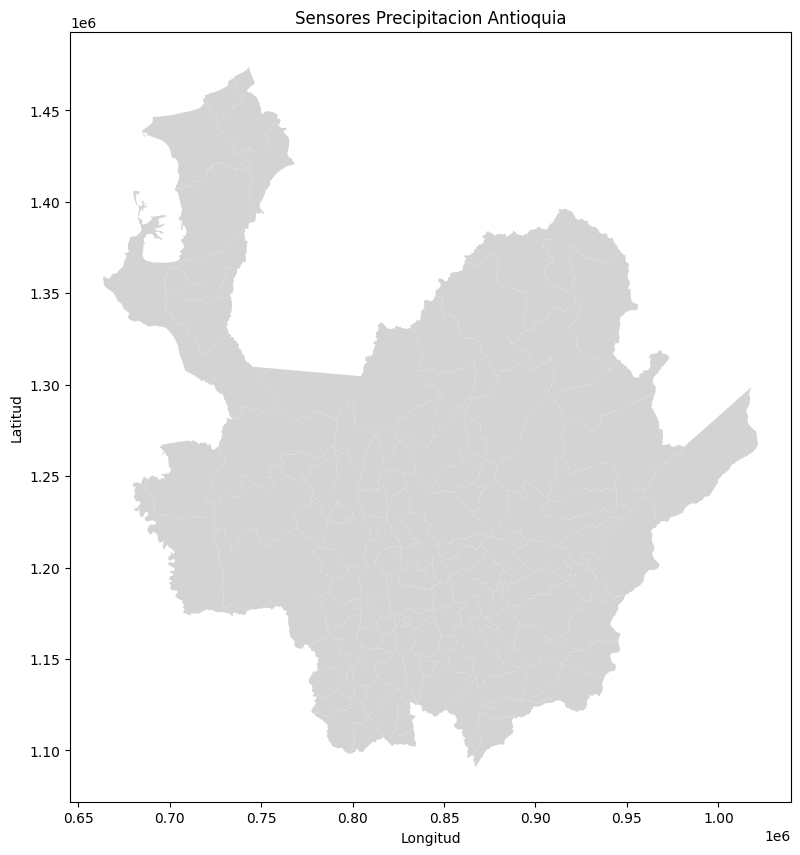

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
Mapa_Antioquia.plot(ax=ax, color='lightgrey') ### Nueva
#ventas_geo.plot(column="cantidad", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("Sensores Precipitacion Antioquia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()